# Lab 8: Define and Solve an ML Problem of Your Choosing

In [26]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [27]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename, header=0)# YOUR CODE HERE

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [28]:
df['occupation'].unique()
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

Using the census dataset, I wish to predict whether an individual's salary is above or below 50K, using the occupations, work class, and hours per week as features. Initially, I hoped to use word embeddings to process the categorical feature values, but realized that was probably unnecessary, considering there are never more than 15 different categories, and one-hot encoding would be easy to implement and evaluate. Thus, the actual content of the categories will not be taken into consideration as it might have using word embeddings, but it shouldn't be necessary in this situation.

This is a supervised learning binary classificiation problem. Not necessarily sure if this will maximize shareholder value, but it can provide insight into how much different careers earn.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [29]:
# YOUR CODE HERE
df.describe()
#according to the internet, capital gain/loss are not counted as part of income by the census 
#bureau so we won't use that as an income feature

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32399.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32236.000000
mean,38.589216,1.897784e+05,10.080679,615.907773,87.303830,40.450428
std,13.647862,1.055500e+05,2.572720,2420.191974,402.960219,12.353748
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,14084.000000,4356.000000,99.000000


In [30]:
df['occupation'].isnull().sum()

df.loc[df['occupation'].isnull() & (df['workclass'] == 'Never-worked'), 'occupation'] = 'Unemployed'

print(df[df['workclass'] == 'Never-worked'])
#out of all the null values for occupation, the ones that have 'Never-worked' in the workclass
#are change to unemployed

        age     workclass  fnlwgt     education  education-num  \
5361   18.0  Never-worked  206359          10th              6   
10845  23.0  Never-worked  188535       7th-8th              4   
14772  17.0  Never-worked  237272          10th              6   
20337  18.0  Never-worked  157131          11th              7   
23232  20.0  Never-worked  462294  Some-college             10   
32304  30.0  Never-worked  176673       HS-grad              9   
32314  18.0  Never-worked  153663  Some-college             10   

           marital-status  occupation   relationship   race  sex_selfID  \
5361        Never-married  Unemployed      Own-child  White  Non-Female   
10845            Divorced  Unemployed  Not-in-family  White  Non-Female   
14772       Never-married  Unemployed      Own-child  White  Non-Female   
20337       Never-married  Unemployed      Own-child  White      Female   
23232       Never-married  Unemployed      Own-child  Black  Non-Female   
32304  Married-civ-sp

In [31]:
df = df.dropna(subset=['occupation'])
df['workclass'].isnull().sum()
#no values in occupation or workclass are null

0

In [32]:
df = df.dropna(subset=['hours-per-week'])
df['hours-per-week'].isnull().sum()

0

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

SOOO I have already removed null values from the features I plan to use (occupation, workclass, hours-per-week) and now will use one-hot encoding to turn the two categorical values into some kind of numerical representation. then do the checking for outliers and all that stuff, idk if i have to standerdize it i will figure that out too, only for the hours worked i suppose since the others are all technically binary. 

The model i would like to implement is decision trees! but I am not yet sure if random forest enseamble method or just standard decision tree is the best decision in this situation. I shall consult the oracle (chatgpt).

In terms of training, just do the usual, pick some very basic parameters and then adjust to improve model performance.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [50]:
# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

so first lets transform the output data into the proper binany calsification label

In [34]:
# YOUR CODE HERE
df['income_binary'].unique()

# Verify the changes


array(['<=50K', '>50K'], dtype=object)

In [35]:
df.rename(columns={'income_binary': 'income <=50k'}, inplace=True)

# Check for unique values before mapping
print(df['income <=50k'].unique())

# Adjust the values for binary classification to 0 and 1
df['income <=50k'] = df['income <=50k'].map({'<=50K': 1, '>50K': 0})

print(df['income <=50k'].unique())


['<=50K' '>50K']
[1 0]


In [36]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income <=50k
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,1
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,1
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,1
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,1
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,1


In [37]:
df_encoded = pd.get_dummies(df, columns=['occupation', 'workclass'])

In [38]:
df_encoded.head()


,age,fnlwgt,education,education-num,marital-status,relationship,race,sex_selfID,capital-gain,capital-loss,...,occupation_Transport-moving,occupation_Unemployed,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,39.0,77516,Bachelors,13,Never-married,Not-in-family,White,Non-Female,2174,0,...,0,0,0,0,0,0,0,0,1,0
1,50.0,83311,Bachelors,13,Married-civ-spouse,Husband,White,Non-Female,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38.0,215646,HS-grad,9,Divorced,Not-in-family,White,Non-Female,0,0,...,0,0,0,0,0,1,0,0,0,0
3,53.0,234721,11th,7,Married-civ-spouse,Husband,Black,Non-Female,0,0,...,0,0,0,0,0,1,0,0,0,0
4,28.0,338409,Bachelors,13,Married-civ-spouse,Wife,Black,Female,0,0,...,0,0,0,0,0,1,0,0,0,0


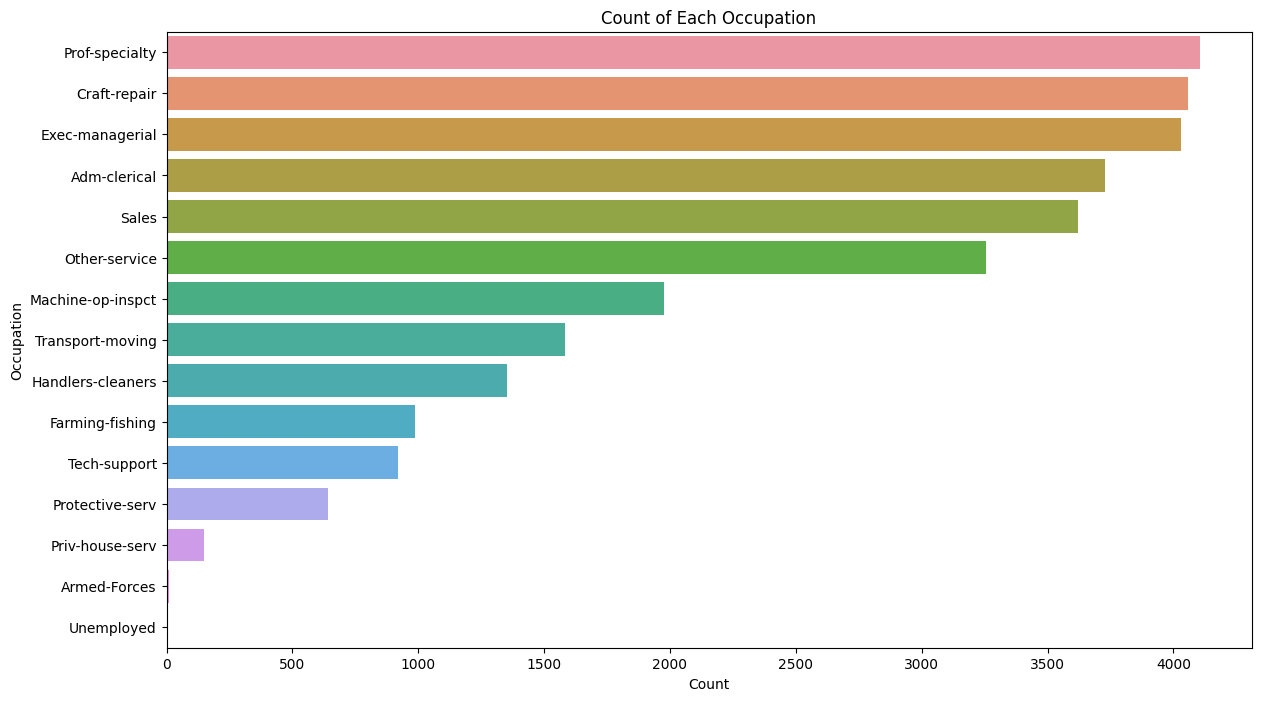

In [39]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='occupation', order=df['occupation'].value_counts().index)
plt.title('Count of Each Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()
#wow awesome graph!!

Time to split the data wahoo!!

In [40]:
y = df_encoded['income <=50k']

irrelevant_columns = [
    'age', 'education', 'education-num', 'marital-status', 'fnlwgt',
   'relationship', 'race', 'sex_selfID', 'capital-gain',
    'capital-loss', 'native-country', 'income <=50k'
]
X = df_encoded.drop(columns=irrelevant_columns)

In [41]:
X
#trying to think if there is a way to incorporate the fnlwgt stat into this? gonna remove for now

,hours-per-week,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,...,occupation_Transport-moving,occupation_Unemployed,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,40.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,13.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,40.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,40.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,38.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
32557,40.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
32558,40.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
32559,20.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [43]:
X_train.shape
X_test.shape

(7606, 24)

In [44]:
# the parameter grid is recycled from a previous assignment (might adjust as needed)
#Note these are the same values as those we used above
hyperparams_depth = [2**n for n in range(2,5)]

# Create a range of hyperparameter values for 'min_samples_leaf'. 
hyperparams_leaf = [25*2**n for n in range(0,3)]

# Create parameter grid.
param_grid={'max_depth':hyperparams_depth, 'min_samples_leaf':hyperparams_leaf}
param_grid

{'max_depth': [4, 8, 16], 'min_samples_leaf': [25, 50, 100]}

In [45]:
model = DecisionTreeClassifier()
grid = GridSearchCV(model, param_grid, cv=5)
grid_search = grid.fit(X_train, y_train)

In [46]:
print('Optimal hyperparameters: {0}'.format(grid_search.best_params_))

# print best accuracy score resulting from this configuration
print('Accuracy score: {0}'.format(grid_search.best_score_))

Optimal hyperparameters: {'max_depth': 8, 'min_samples_leaf': 100}
Accuracy score: 0.7762291114579929


In [47]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, min_samples_leaf = 100)

    # 2. Fit the model to the training data below
    # YOUR CODE HERE
model.fit(X_train, y_train)
    
    # 3. Make predictions on the test data below and assign the result to the variable 'class_label_predictions'
    # YOUR CODE HERE
class_label_predictions = model.predict(X_test)

    # 4. Compute the accuracy here and save the result to the variable 'acc_score'
    # YOUR CODE HERE
acc_score = accuracy_score(y_test, class_label_predictions)
acc_score

0.7713647120694189

In [34]:
#now lets check feature importance even though we dont have many features
feature_imp = model.feature_importances_

#2. Create a Pandas DataFrame with a list of all features and their scores. 
# Save the result to the variable 'df_features'

# YOUR CODE HERE
df_features = pd.DataFrame(data={'name': X_train.columns.values,'imp': feature_imp})

#3. Sort df_features in descending order and
# save the result to the variable 'df_sorted'

# YOUR CODE HERE
df_sorted = df_features.sort_values(by='imp', ascending=False)

#4. Obtain the top 5 sorted feature names and save the result to list 'top_five' 
top_five = df_sorted.iloc[:5]['name'].tolist()

# YOUR CODE HERE
print('Top five features: {0}'.format(top_five))

Top five features: ['hours-per-week', 'occupation_Exec-managerial', 'occupation_Prof-specialty', 'occupation_Other-service', 'workclass_Private']


alright so i tried to perform feature selection by determining which of the 3 features we had were most useful NOT REALIZING that we totally did one-hot encoding, so this isn't really a useful evaluation metric. Now based on the fact that i really did only want to use like 3 features to make these predictions, it is probably best to leave things here as is.

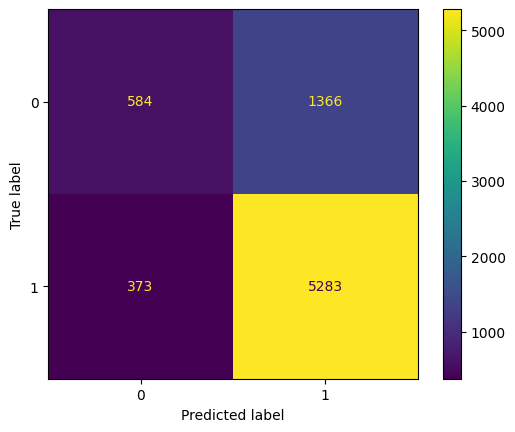

In [48]:
#found this cool visual for cm in scikit learn!
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

looks like we had some difficulty labeling the >50k, or it may just seem that way since there are far more examples of <=50k